In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

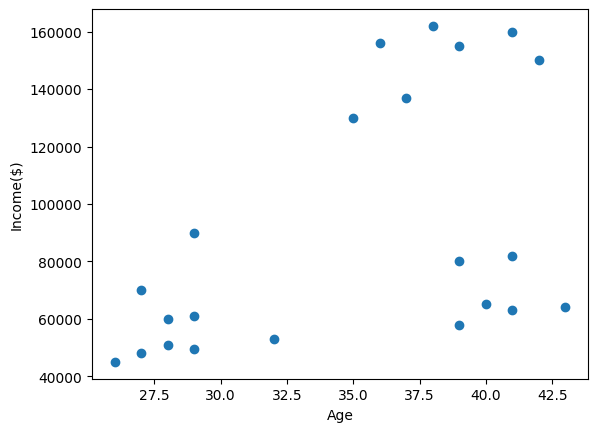

In [13]:
plt.scatter(df.Age , df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age' , 'Income($)']])
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [25]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [26]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

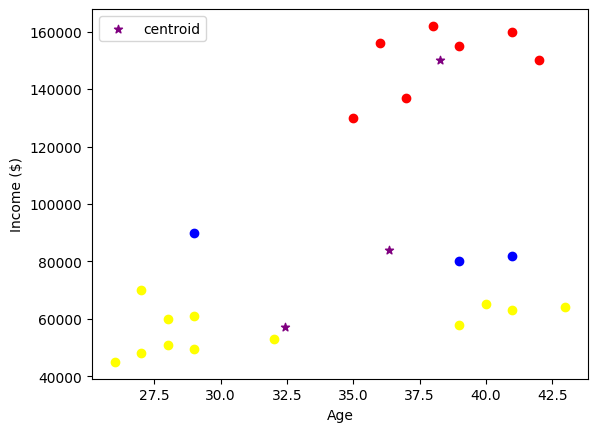

In [33]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age , df1['Income($)'] , color = 'red')
plt.scatter(df2.Age , df2['Income($)'] , color = 'yellow')
plt.scatter(df3.Age , df3['Income($)'] , color = 'Blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [34]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [35]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


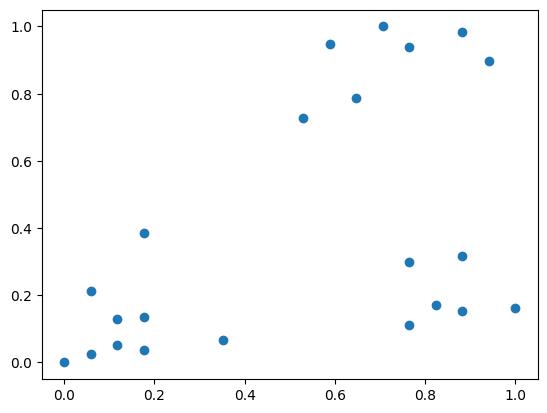

In [37]:
plt.scatter(df.Age,df['Income($)'])

In [38]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [39]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [40]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

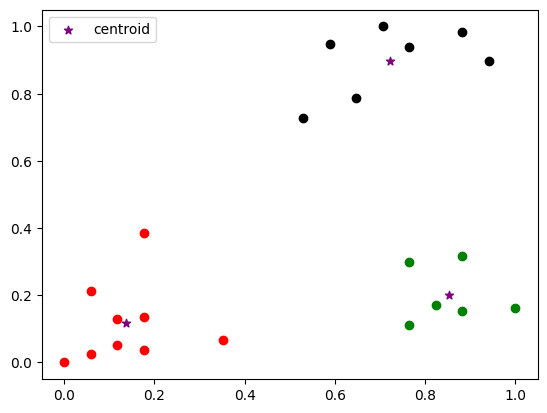

In [41]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [42]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

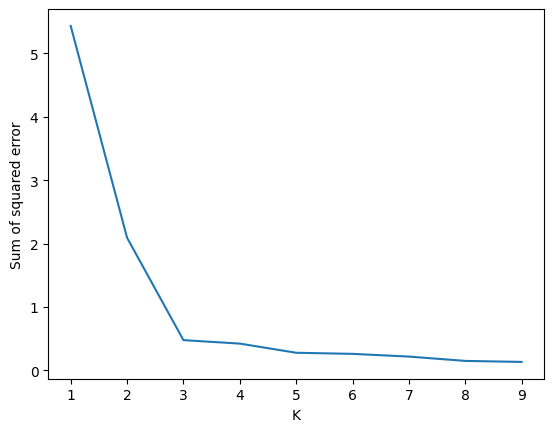

In [43]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)